## 1. Importing Libraries

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np

# For evaluation we will use these libraries

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# For model building we will use these library

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For plotting we will use these libraries

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

## 2. Loading dataset

In [2]:
df = pd.read_csv('weather-report.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


### 2.1 Checking for null values

In [5]:
print('Null Values:',df.isnull().values.sum())
print('NA values:',df.isnull().values.any())

Null Values: 0
NA values: False


### 2.2 Statistical Analysis

In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.describe(include='object')

,date,weather
count,1461,1461
unique,1461,5
top,2014-11-16,rain
freq,1,641


### 2.3 Data Visualization

C:\Users\John Cairo Minerva\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\John Cairo Minerva\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\John Cairo Minerva\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


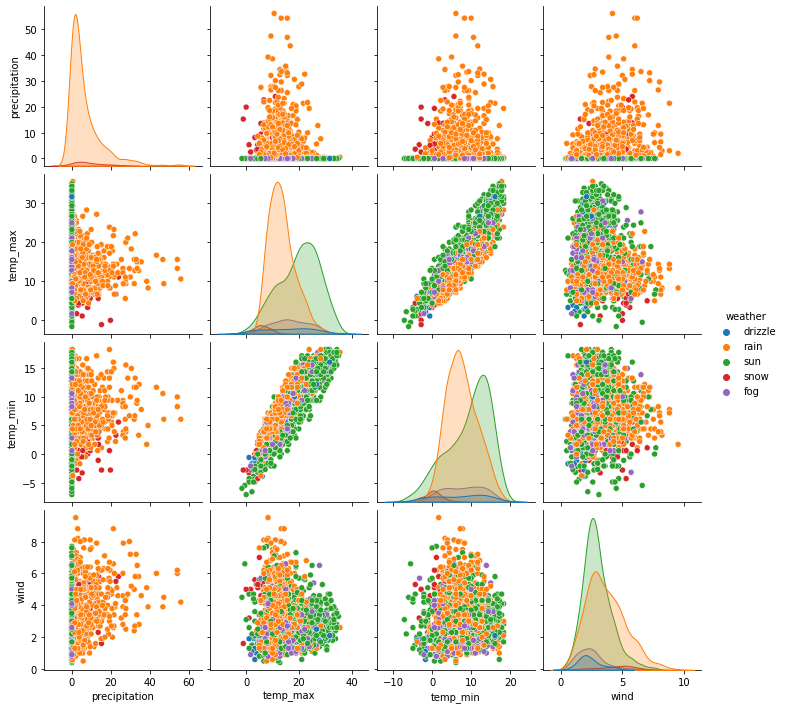

In [8]:
sns.pairplot(data=df, hue='weather')

Text(0.5, 0, 'Parameters')

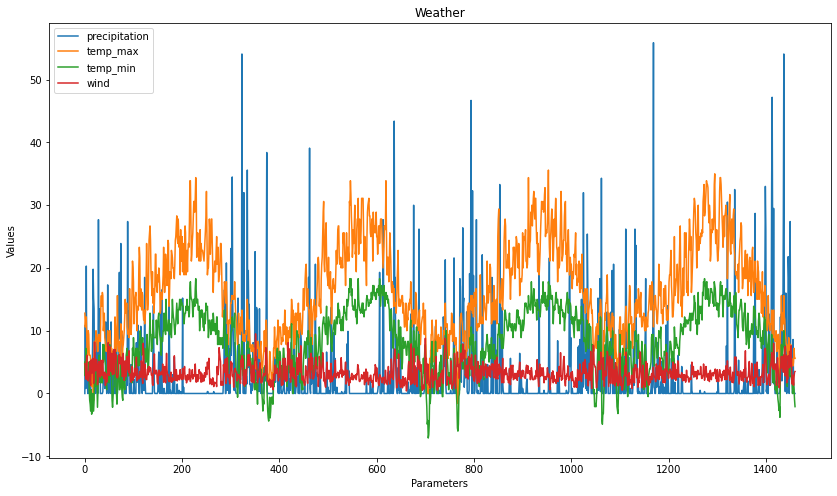

In [9]:
df.plot(kind='line', figsize=(14,8))
plt.title('Weather')
plt.ylabel('Values')
plt.xlabel('Parameters')

<AxesSubplot:>

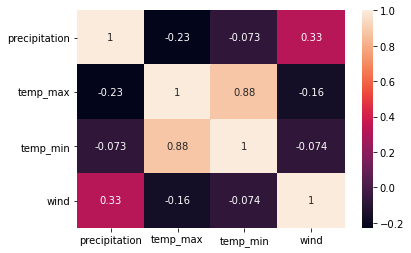

In [10]:
sns.heatmap(data=df.corr(),annot=True)

### 2.4 Focusing on Precipitation Levels

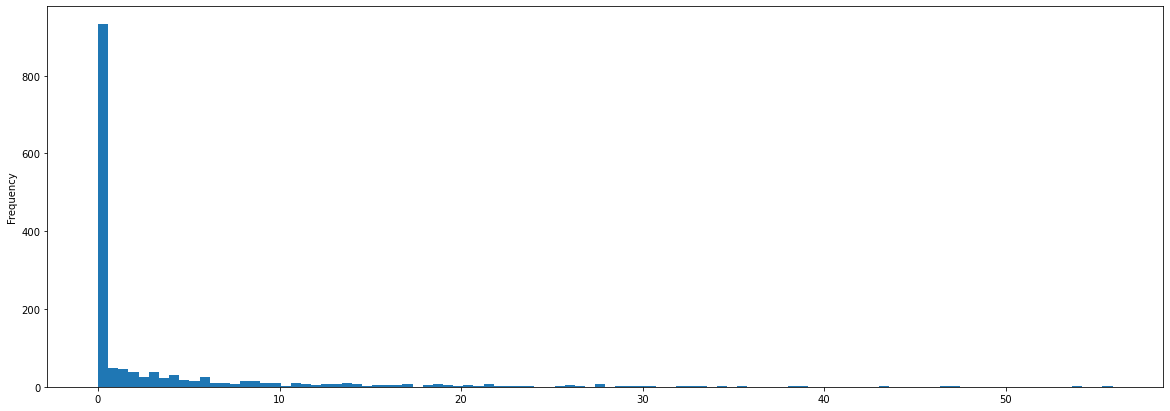

In [11]:
df['precipitation'].plot.hist(bins=100, figsize=(20, 7))
plt.show()

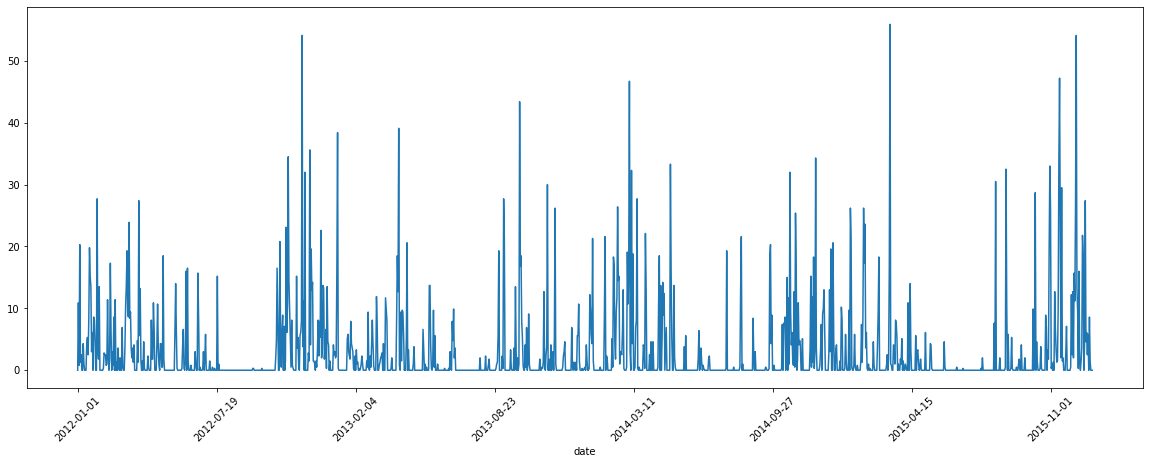

In [12]:
df.groupby('date')['precipitation'].mean().plot(figsize=(20, 7))
plt.xticks(rotation=45)
plt.show()

## 3. Data Preprocessing and Model Building

In [13]:
le = LabelEncoder()

df['weather_label'] = le.fit_transform(df['weather'])
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather,weather_label
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2
7,2012-01-08,0.0,10.0,2.8,2.0,sun,4
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2


In [14]:
#Store labels and name for final use

weather_dict = dict(zip(df['weather_label'], df['weather']))
weather_dict

{0: 'drizzle', 2: 'rain', 4: 'sun', 3: 'snow', 1: 'fog'}

### 3.1 Preparing Data for Model Building 

In [15]:
df = df.drop('date',axis=1)

In [16]:
df['weather']=df['weather'].astype('category')
df['weather']=df['weather'].cat.codes

### 3.2 Dividing data into dependent and independent components

In [17]:
x = df.drop(['weather_label'], axis = 1)
y = df['weather_label']

In [18]:
x

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [19]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather_label, Length: 1461, dtype: int32

### 3.3 Split the dataset for training and testing

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [21]:
print("*"*40)
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************
Shape of x training data :  (1022, 5)
Shape of y training data :  (1022,)
****************************************
Shape of x testing data :  (439, 5)
Shape of y testing data :  (439,)
****************************************


### 3.4 Scaling the data 

In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 4. Model Building

In [23]:
# Logistic Regression

classifier_log=LogisticRegression(random_state=0)
classifier_log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [24]:
# Naive Bayes

classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train, y_train,sample_weight=None)

GaussianNB()

In [25]:
# Random Forest Classifier

classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## 5. Analyzing results

In [26]:
classifier_list=[classifier_log, classifier_gnb, classifier_rfc]

In [27]:
# accuracy = correct answer(marks) / total marks

def accuracy(x_test, y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    y_pred=classifier.predict(x_test)
    correct=0
    total=len(y_pred)
    for i,j in zip(y_pred, y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(y_test,y_pred)+"\n")
    cm=confusion_matrix(y_test,y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [28]:
accuracy_list=[]
classifier_list_str=[]

In [29]:
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:6])   


classifier
LogisticRegression(random_state=0)

98.86104783599089
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        32
           2       0.99      1.00      0.99       192
           3       1.00      0.38      0.55         8
           4       0.98      1.00      0.99       193

    accuracy                           0.99       439
   macro avg       0.99      0.88      0.91       439
weighted avg       0.99      0.99      0.99       439


Confusion Matrix
[[ 14   0   0   0   0]
 [  0  32   0   0   0]
 [  0   0 192   0   0]
 [  0   0   2   3   3]
 [  0   0   0   0 193]]


classifier
GaussianNB()

100.0
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
 

In [30]:
accuracy_list

[98.86104783599089, 100.0, 99.77220956719817]

In [31]:
classifier_list_str

['Logist', 'Gaussi', 'Random']

### 5.1 Accuracy of Multiple Classification Models

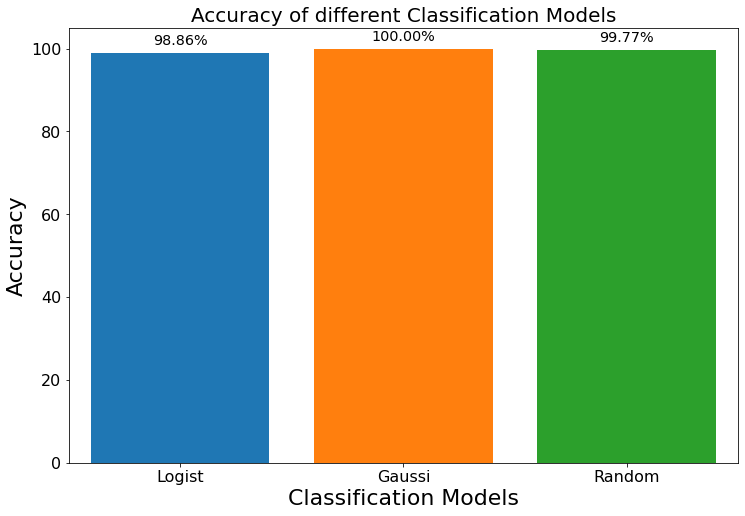

In [32]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation =1.5)
plt.xlabel("Classification Models", fontsize = 22)
plt.ylabel("Accuracy", fontsize = 22)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 16, horizontalalignment = 'center')
plt.yticks(fontsize = 16)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

plt.show()

### 5.2 Plotting the Confusion Matrix

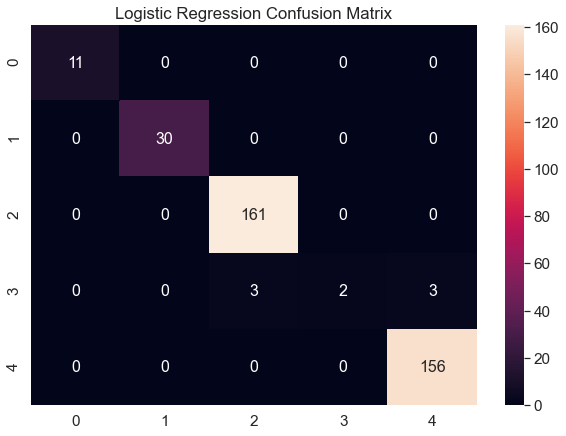

In [33]:
# Logistic Regression

array = [[ 11,0,0,0,0],
         [0,30,0,0,0],
        [0,0,161,0,0],
         [0,0,3,2,3],
         [0,0,0,0,156]]

df_cm = pd.DataFrame(array, range(5), range(5))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size

plt.show()

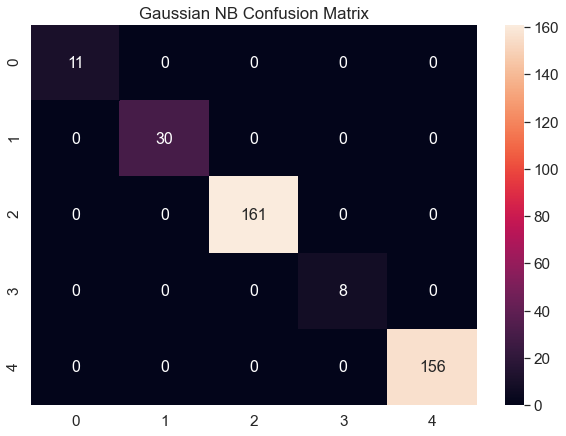

In [34]:
# Naive Bayes

array = [[11,0,0,0,0],
         [0,30,0,0,0],
         [0,0,161,0,0],
         [0,0,0,8,0],
         [0,0,0,0,156]]

df_cm = pd.DataFrame(array, range(5), range(5))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
plt.title("Gaussian NB Confusion Matrix")
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size

plt.show()

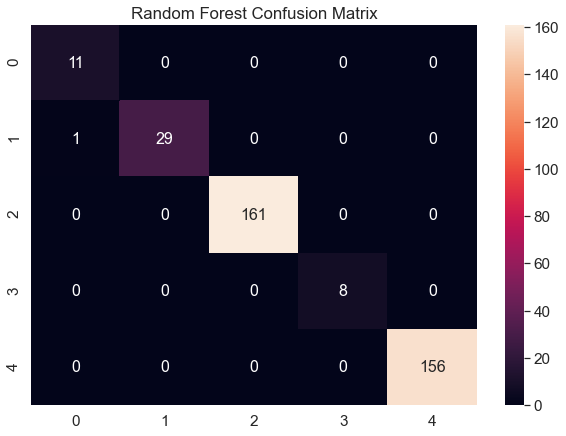

In [35]:
# Random Forest

array = [[11,0,0,0,0],
         [1,29,0,0,0],
        [0,0,161,0,0],
         [0,0,0,8,0],
         [0,0,0,0,156]]

df_cm = pd.DataFrame(array, range(5), range(5))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
plt.title("Random Forest Confusion Matrix")
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size

plt.show()

### 5.3 Plotting the Actual vs. Predicted Values

Train score:
0.9941291585127201
Test score:
0.9886104783599089


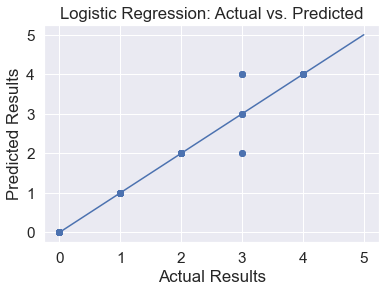

In [36]:
# Logistic Regression Scatterplot

model = classifier_log.fit(x_train,y_train)

y_pred=classifier_log.predict(x_test)

print("Train score:")
print(classifier_log.score(x_train, y_train))

print("Test score:")
print(classifier_log.score(x_test, y_test))

# Plotting the results of logistic regression

plt.scatter(y_test, y_pred)
plt.plot(range(6), range(6))

plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.title("Logistic Regression: Actual vs. Predicted")

plt.show()

Train score:
1.0
Test score:
1.0


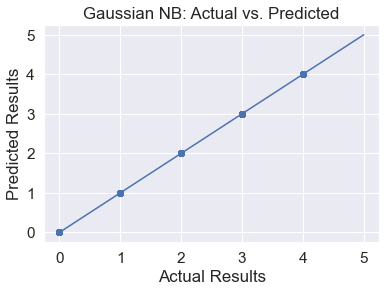

In [37]:
# Gaussian Naive Bayes Scatterplot

model = classifier_gnb.fit(x_train,y_train)

y_pred=classifier_gnb.predict(x_test)

print("Train score:")
print(classifier_gnb.score(x_train, y_train))

print("Test score:")
print(classifier_gnb.score(x_test, y_test))

# Plotting the results of logistic regression

plt.scatter(y_test, y_pred)
plt.plot(range(6), range(6))

plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.title("Gaussian NB: Actual vs. Predicted")

plt.show()

Train score:
1.0
Test score:
0.9977220956719818


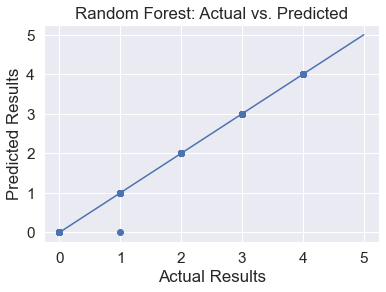

In [38]:
# Random Forest Scatterplot

model = classifier_rfc.fit(x_train,y_train)

y_pred=classifier_rfc.predict(x_test)

print("Train score:")
print(classifier_rfc.score(x_train, y_train))

print("Test score:")
print(classifier_rfc.score(x_test, y_test))

# Plotting the results of logistic regression

plt.scatter(y_test, y_pred)
plt.plot(range(6), range(6))

plt.xlabel("Actual Results")
plt.ylabel("Predicted Results")
plt.title("Random Forest: Actual vs. Predicted")

plt.show()